#### Task 1: Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
df_1= df.copy()

In [6]:
df.shape

(2000, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df_1.drop(columns=['Unnamed: 0'], inplace=True)

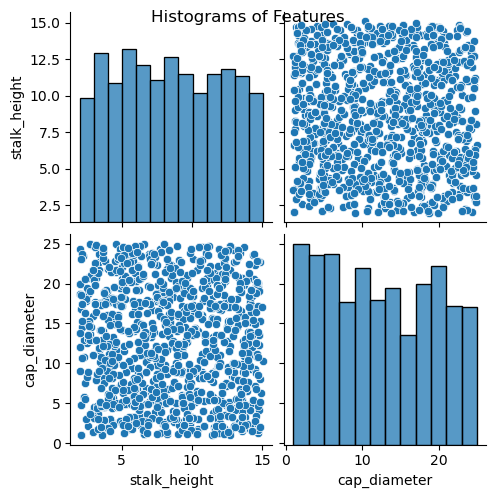

In [9]:
# Pairplot for each feature
sns.pairplot(df)
plt.suptitle('Histograms of Features')
plt.show()

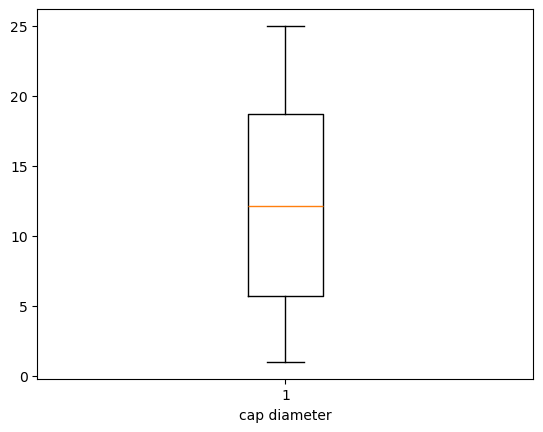

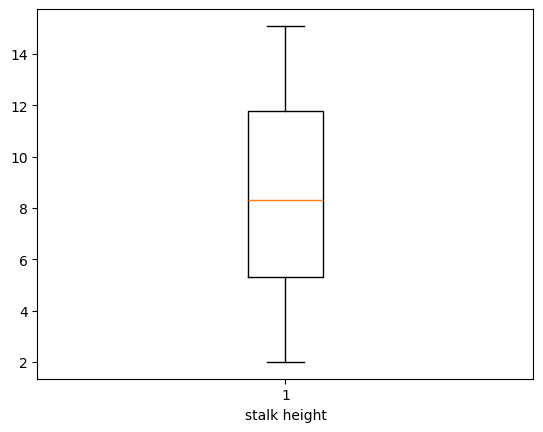

In [10]:

plt.boxplot(df.iloc[:, -1])
plt.xlabel('cap diameter')
plt.show()

plt.boxplot(df.iloc[:, -2])
plt.xlabel('stalk height')
plt.show()

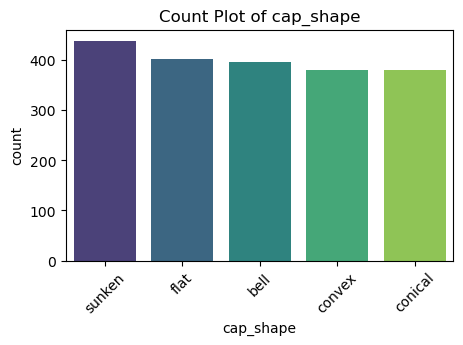

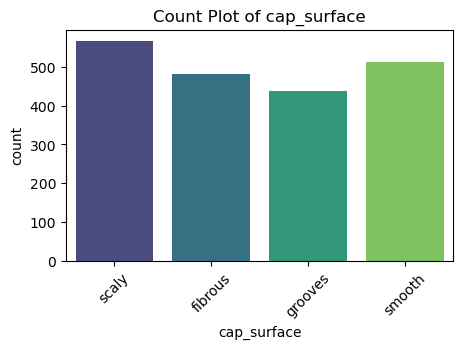

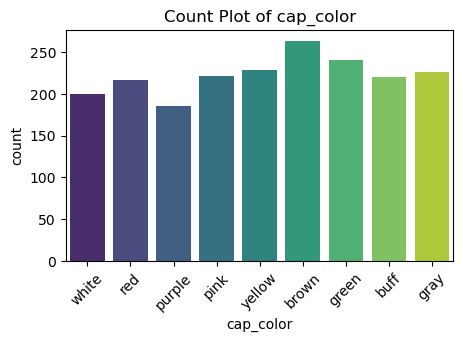

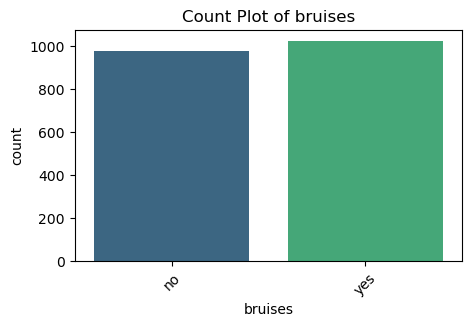

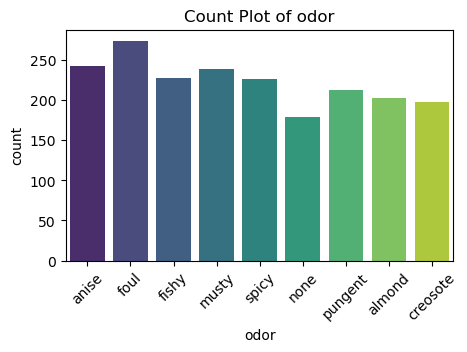

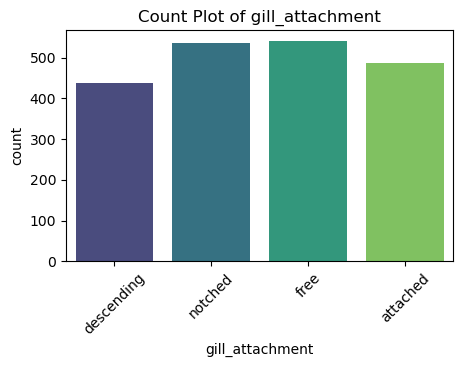

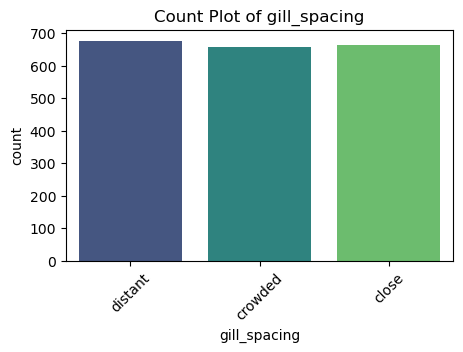

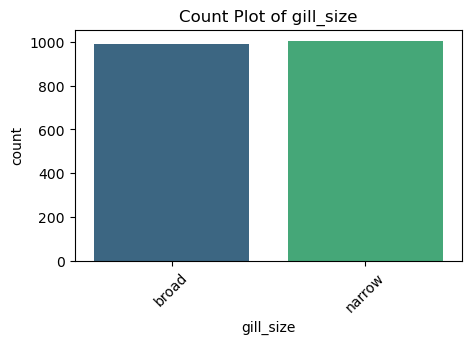

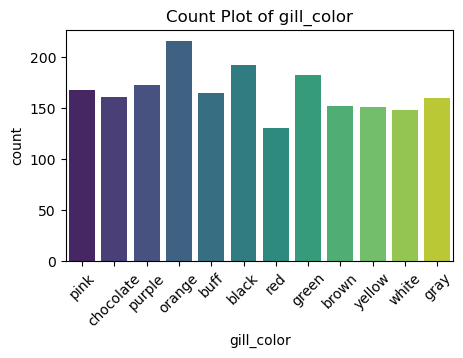

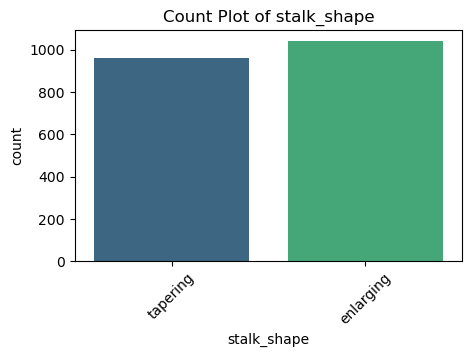

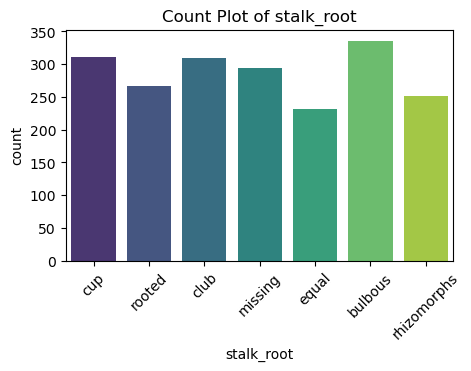

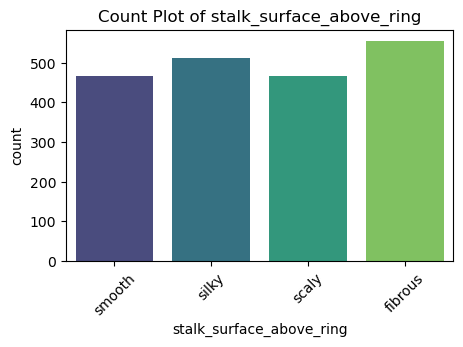

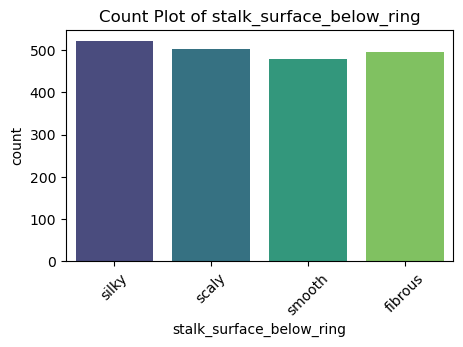

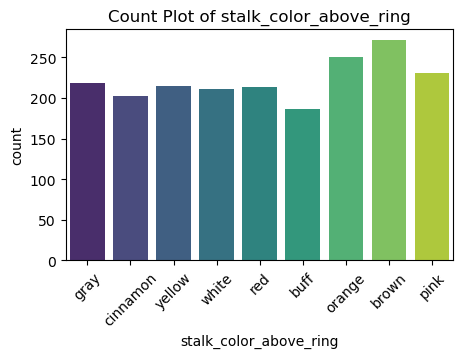

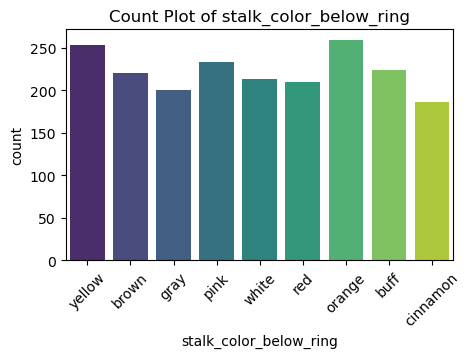

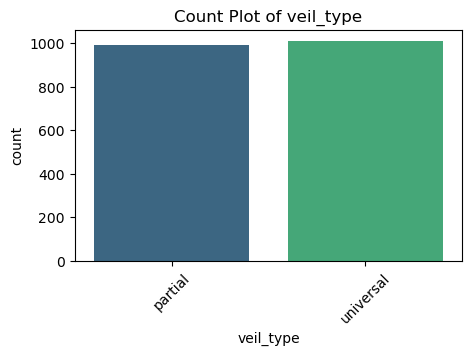

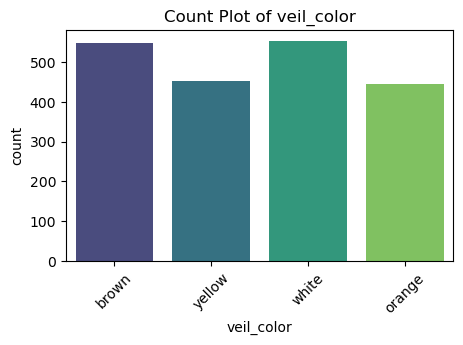

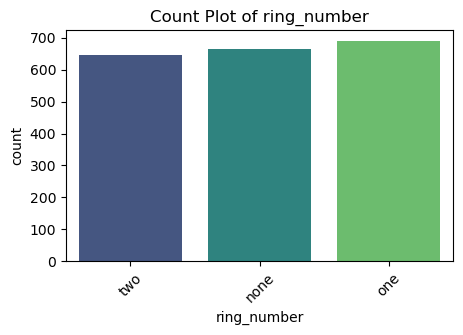

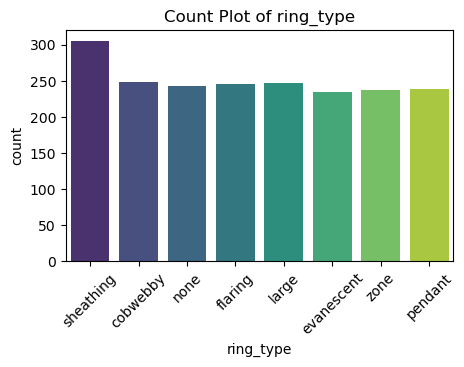

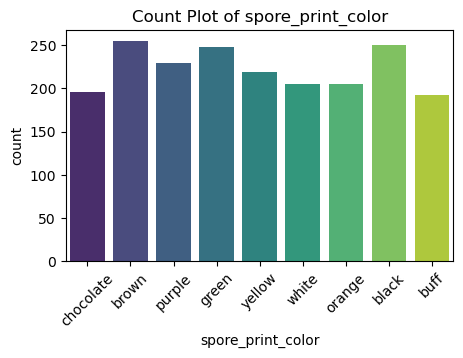

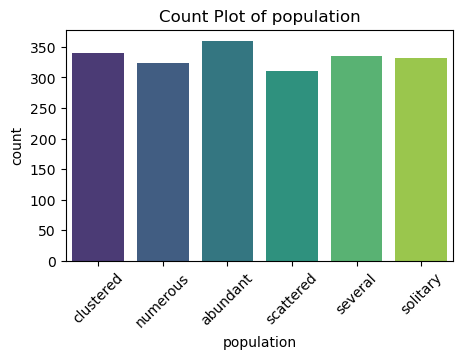

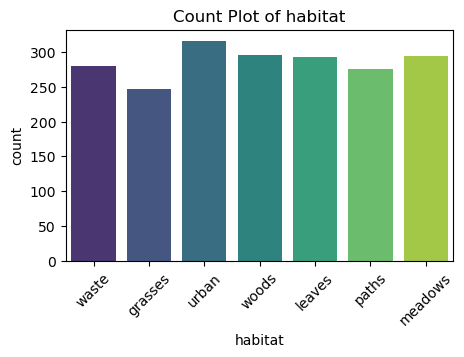

In [11]:
# List of categorical columns (excluding the target variable if needed)
Columns_name = [
    'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 
    'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
    'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
    'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
    'ring_type', 'spore_print_color', 'population', 'habitat'
]

# Create count plots for each categorical feature
for column in Columns_name:
    plt.figure(figsize=(5,3))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [12]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of object type
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique values: {unique_values}")
        print("-" * 50)  # Separator for readability

Column: cap_shape
Unique values: ['sunken' 'flat' 'bell' 'convex' 'conical']
--------------------------------------------------
Column: cap_surface
Unique values: ['scaly' 'fibrous' 'grooves' 'smooth']
--------------------------------------------------
Column: cap_color
Unique values: ['white' 'red' 'purple' 'pink' 'yellow' 'brown' 'green' 'buff' 'gray']
--------------------------------------------------
Column: bruises
Unique values: ['no' 'yes']
--------------------------------------------------
Column: odor
Unique values: ['anise' 'foul' 'fishy' 'musty' 'spicy' 'none' 'pungent' 'almond'
 'creosote']
--------------------------------------------------
Column: gill_attachment
Unique values: ['descending' 'notched' 'free' 'attached']
--------------------------------------------------
Column: gill_spacing
Unique values: ['distant' 'crowded' 'close']
--------------------------------------------------
Column: gill_size
Unique values: ['broad' 'narrow']
-------------------------------------

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
columns_to_encod = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class']
# Convert each categorical column to numeric values
for column in columns_to_encod:
    df[column] = le.fit_transform(df[column])
df.head()


,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [14]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (1400, 24), (1400,)
Testing set: (600, 24), (600,)


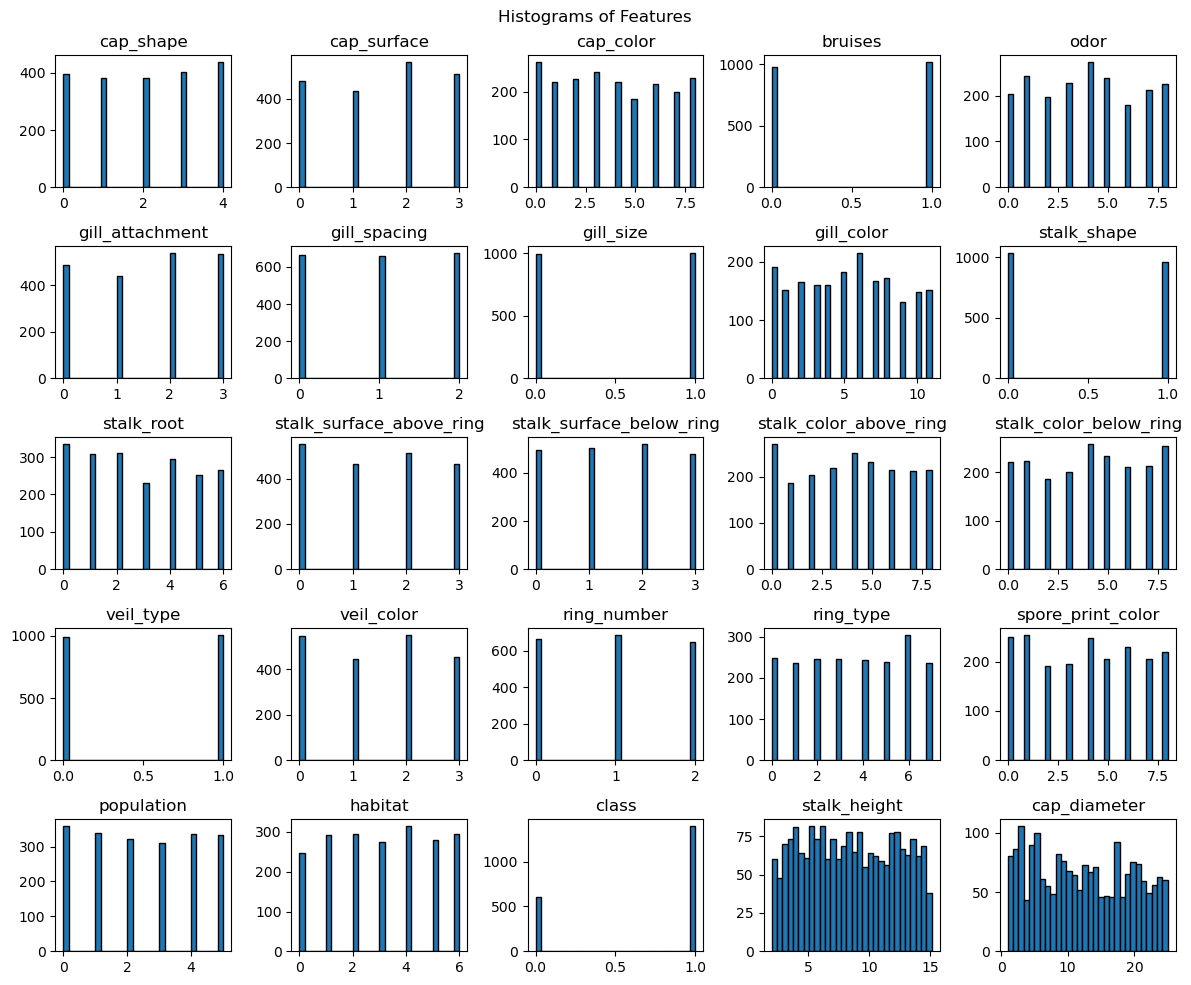

In [15]:
# Histograms for each feature
df.hist(figsize=(12, 10), bins=30, edgecolor='black' , grid = False)
plt.suptitle('Histograms of Features')
plt.tight_layout()
plt.show()

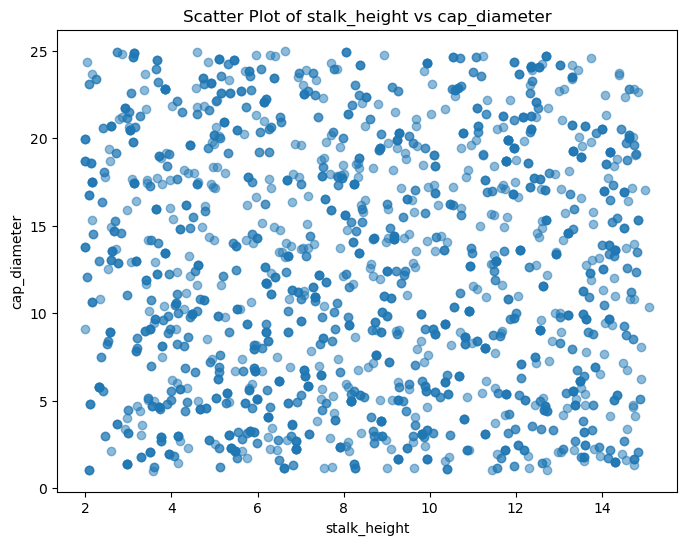

In [16]:
# Scatter plots for pairs of numeric features
numeric_columns = ['stalk_height', 'cap_diameter']  # Include numeric features if any

for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df[numeric_columns[i]], df[numeric_columns[j]], alpha=0.5)
        plt.xlabel(numeric_columns[i])
        plt.ylabel(numeric_columns[j])
        plt.title(f'Scatter Plot of {numeric_columns[i]} vs {numeric_columns[j]}')
        plt.show()


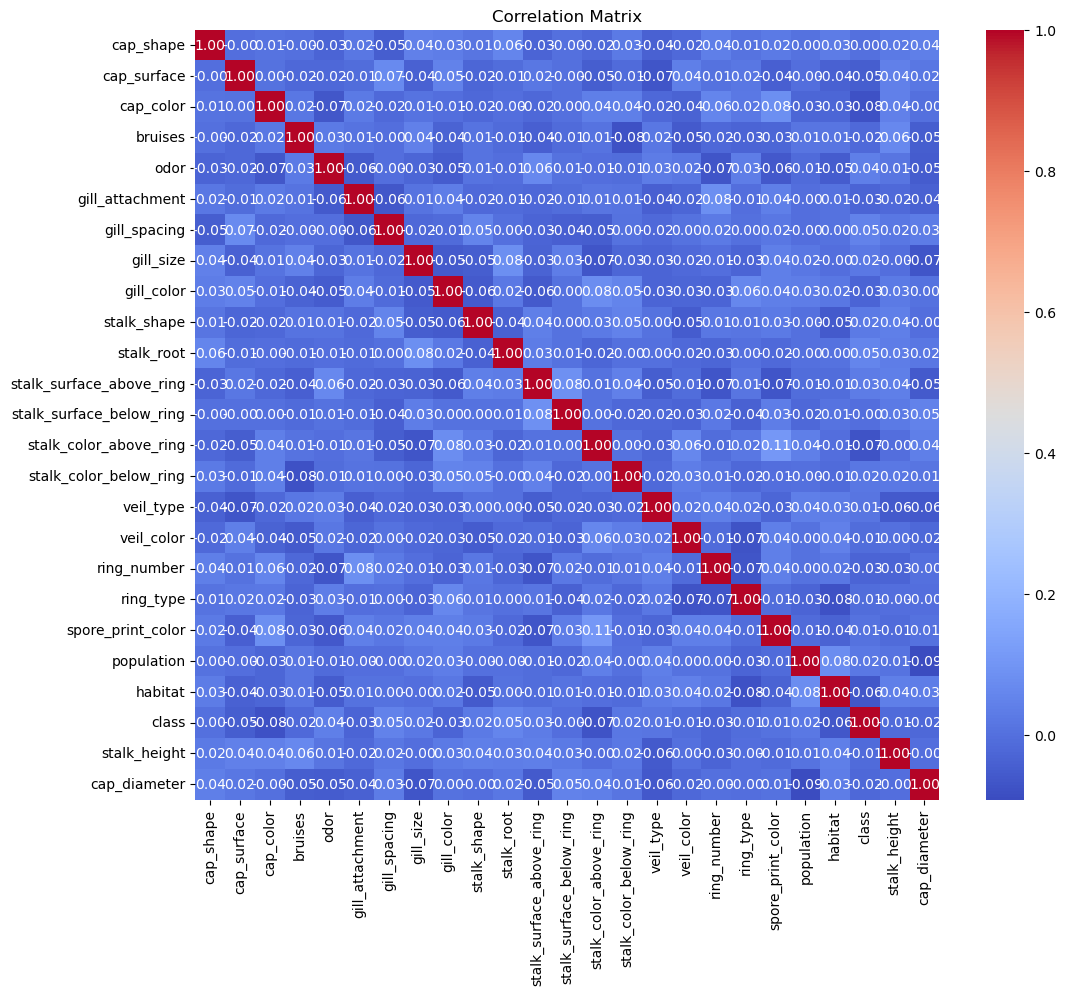

In [17]:
# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM classifier
svm_model = SVC(kernel='linear')  

# Train the SVM model
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [19]:
# Predict the class labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate and display performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.6917
Precision: 0.6917
Recall: 1.0000
F1 Score: 0.8177


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM classifier
svm_model = SVC(kernel='poly')  # You can change the kernel to 'rbf', 'poly', etc.

# Train the SVM model
svm_model.fit(X_train, y_train)


SVC(kernel='poly')

In [21]:
# Predict the class labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate and display performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7183
Precision: 0.7106
Recall: 1.0000
F1 Score: 0.8308


#### the accuracy, precision, recall, F1-score for both the method are same

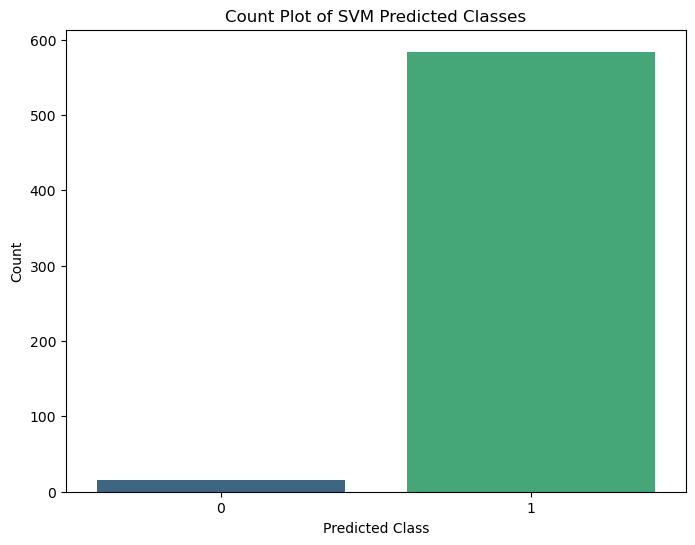

In [23]:
# Create a count plot for predicted class labels
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, palette='viridis')
plt.title('Count Plot of SVM Predicted Classes')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()


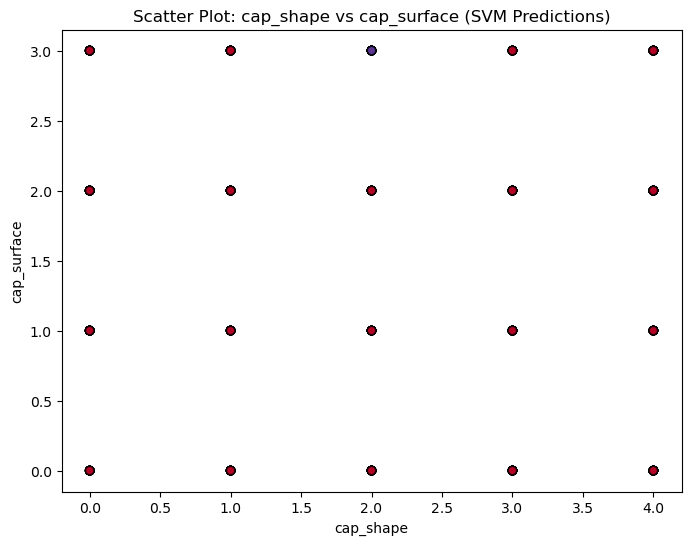

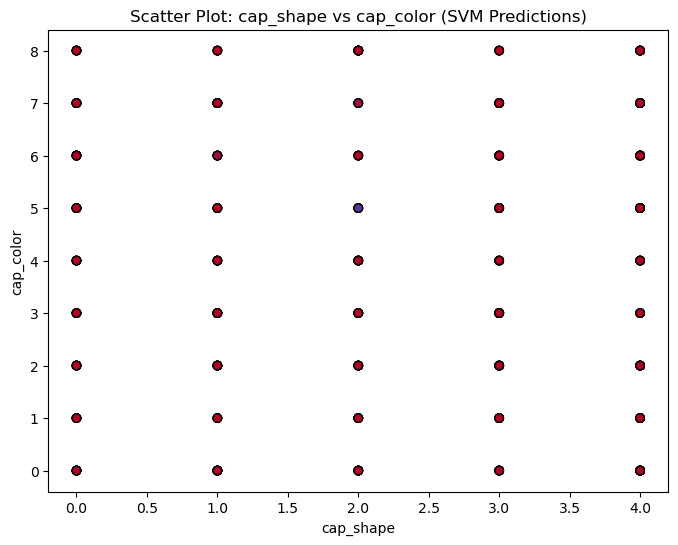

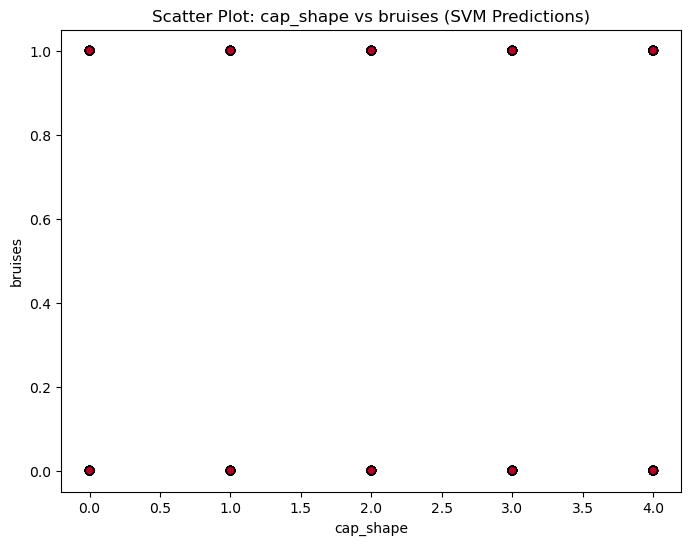

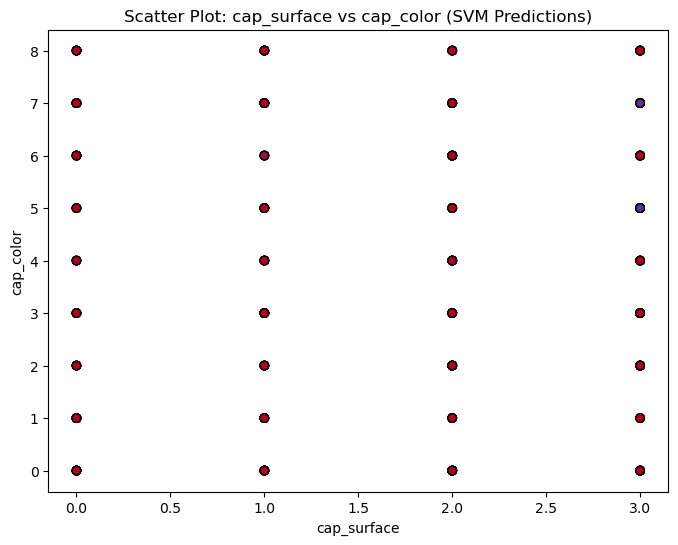

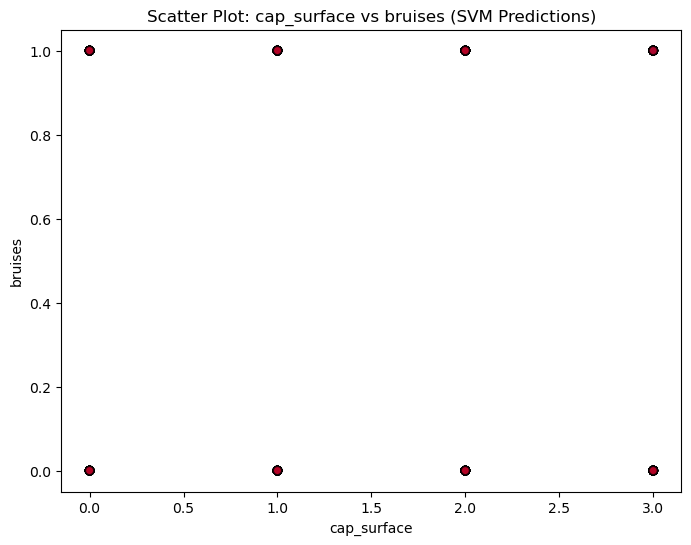

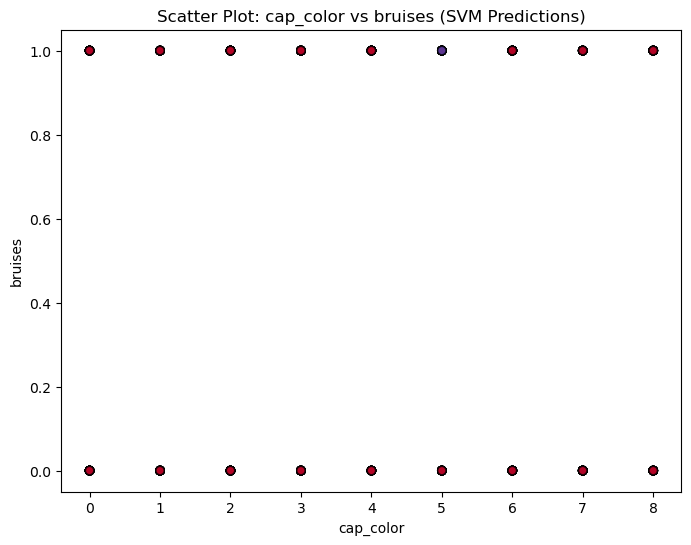

In [24]:
# Select a subset of columns to plot (you can adjust this list)
subset_columns = ['cap_shape', 'cap_surface', 'cap_color', 'bruises']

# Create scatter plots for each unique pair of features
for i in range(len(subset_columns)):
    for j in range(i + 1, len(subset_columns)):  # Ensure j > i to avoid duplicate pairings
        plt.figure(figsize=(8, 6))
        plt.scatter(X_test[subset_columns[i]], X_test[subset_columns[j]], c=y_pred, cmap='coolwarm', edgecolors='k', alpha=0.7)
        plt.title(f'Scatter Plot: {subset_columns[i]} vs {subset_columns[j]} (SVM Predictions)')
        plt.xlabel(subset_columns[i])
        plt.ylabel(subset_columns[j])
        plt.show()


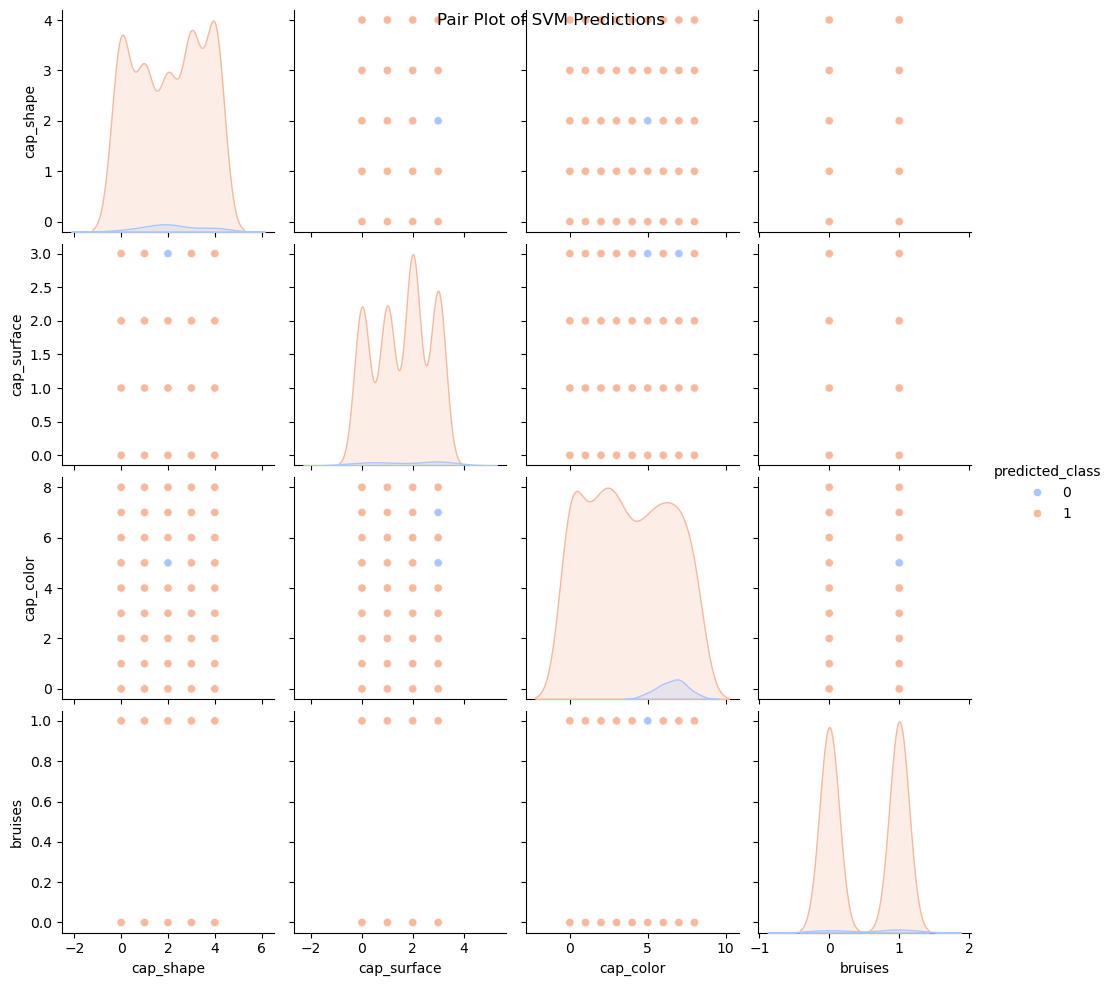

In [25]:

# Combine the test set and predicted labels for visualization
X_test['predicted_class'] = y_pred

# Select a subset of columns to visualize
subset_columns = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'predicted_class']

# Create a pair plot
sns.pairplot(X_test[subset_columns], hue='predicted_class', palette='coolwarm')
plt.suptitle('Pair Plot of SVM Predictions')
plt.show()

# Remove the predicted_class column after plotting to keep X_test clean
X_test.drop(columns='predicted_class', inplace=True)


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [27]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Gamma is only relevant for 'rbf' and 'poly'
}



* Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

#### linear

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM classifier
svm_model = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
# Predict the class labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate and display performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6917
Precision: 0.6917
Recall: 1.0000
F1 Score: 0.8177


#### polynomial

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM classifier
svm_model = SVC(kernel='poly')  # You can change the kernel to 'rbf', 'poly', etc.

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='poly')

In [34]:
# Predict the class labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate and display performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7183
Precision: 0.7106
Recall: 1.0000
F1 Score: 0.8308


#### radial basis function

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can change the kernel to 'rbf', 'poly', etc.

# Train the SVM model
svm_model.fit(X_train, y_train)

SVC()

In [37]:
# Predict the class labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate and display performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6917
Precision: 0.6917
Recall: 1.0000
F1 Score: 0.8177
